# Text Classification with XGBoost - Testing Without Stopwords

In [15]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib as mpl  # to visualize data
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib.colors as mcolors # to visualize colors
import seaborn as sns # to visualize data
from sklearn.feature_extraction.text import TfidfVectorizer # to transfrom the text into numbers
from sklearn.metrics import * # to calculate the metrics
import pickle
import xgboost as xgb# used model

In [16]:
# Load the classifier from the file
with open('../../Training/XGBoost/XGBoost_without_stopwords.pkl', 'rb') as file:
    classifier = pickle.load(file)

# Check if the classifier is loaded correctly
print(classifier)

# load the vectorizer from file
with open('../../../Data-Preparation/sentiment140/tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)
print(loaded_vectorizer)

XGBClassifier(base_score=None, booster=None, boosting_type='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, ...)
TfidfVectorizer()


In [17]:
test_no_stop = pd.read_csv('../../../Data-Preparation/sentiment140/testdata_with_stopwords_preprocessed.csv')

In [18]:
test_no_stop.head()

,Text,Ground_Truth_Label,target
0,would like to have even a little bit of time o...,negative,0
1,Looking forward to keeping in touch with Naomi...,positive,4
2,"@NBATVAndre No, in Germany the NBA has no airt...",negative,0
3,"@AliChemist Your future self's in trouble, the...",positive,4
4,@remco_dekker did you know there is a reason w...,positive,4


In [19]:
# extraction of feature and labels
test_no_stop['target'] = test_no_stop['target'].replace(4,1)
X_test_no_stop = test_no_stop.drop(['target'], axis=1).copy()
Y_test_no_stop = test_no_stop['target'].copy()

### Vectorization of the Data

Vectorization is a necessary step, as machine learning models are only capable of processing numerical data. 

In [20]:
X_testing_no_stop = loaded_vectorizer.transform(X_test_no_stop['Text'].astype(str))

In [21]:
# Predict using imported classifier and vectorized test data
predictions_no_stop = classifier.predict(X_testing_no_stop)

In [22]:
accuracy = accuracy_score(Y_test_no_stop, predictions_no_stop)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 72.49%


## Evaluation

In [ ]:
beta = 1 / (2**0.5) # used for model evaluation

In [1]:
# calculate metrics
accuracy = accuracy_score(Y_test_no_stop, predictions_no_stop)
precision = precision_score(Y_test_no_stop, predictions_no_stop, pos_label=1)
recall = recall_score(Y_test_no_stop, predictions_no_stop, pos_label=1)
f1 = f1_score(Y_test_no_stop, predictions_no_stop, pos_label=1)
f_beta = fbeta_score(Y_test_no_stop, predictions_no_stop, beta=beta, pos_label=1)

# visualize metrics
print('XGBoost without Stopwords on test data')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"F-beta Score (beta={beta}): {f_beta}")

NameError: name 'accuracy_score' is not defined

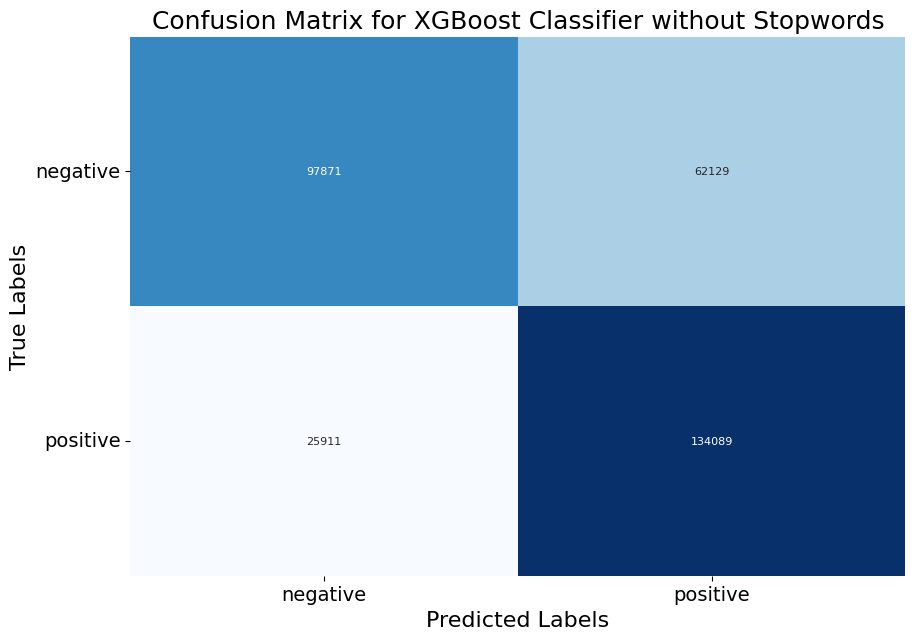

In [24]:
cm_nb = confusion_matrix(Y_test_no_stop, predictions_no_stop)


# creation of the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 8})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for XGBoost Classifier without Stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()